In [96]:
import pymongo
import pandas as pd

macb = pd.read_csv('MACBs.csv', encoding='ISO-8859-1')
macb.head()
macb.to_json('MACBs.json')
macbs = open('MACBs.json')
macbs.read()
data = macb.to_dict(orient='records')


tf = pd.read_csv('TFs.csv', encoding='ISO-8859-1')
tf.to_json('TFs.json')
tfs = open('TFs.json')
tfs.read()
data1 = tf.to_dict(orient='records')

af = pd.read_csv('ASFRs.csv', encoding='ISO-8859-1')
af.to_json('ASFRs.json')
afs = open('ASFRs.json')
afs.read()
data2 = tf.to_dict(orient='records')

#creating connections
client = pymongo.MongoClient()

# my database name
my_db = client['CEN']

# my collections
my_col = my_db['MACBs']
my_col1 = my_db['TFs']
my_col2 = my_db['ASFRs']

my_col.insert_many(data)
my_col1.insert_many(data1)
my_col2.insert_many(data2)

country = []
try:
    # to fecth info
    print(my_db.list_collection_names())
    for x in my_col.find():
        print(x)
    for x in my_col1.find():
        print(x)
    for x in my_col2.find():
        print(x)
        
    # to modify
    
    # to put
except Exception:
    print("Unable to connect to the server.")


['ASFRs', 'MACBs', 'TFs']
{'_id': ObjectId('618e4009dbe6fcfbea48e8d5'), 'Location': 'Algeria', '2010 - 2015': 31.49, '2015 - 2020': 31.66}
{'_id': ObjectId('618e4009dbe6fcfbea48e8d6'), 'Location': 'Angola', '2010 - 2015': 28.74, '2015 - 2020': 28.79}
{'_id': ObjectId('618e4009dbe6fcfbea48e8d7'), 'Location': 'Benin', '2010 - 2015': 29.0, '2015 - 2020': 28.86}
{'_id': ObjectId('618e4009dbe6fcfbea48e8d8'), 'Location': 'Botswana', '2010 - 2015': 28.07, '2015 - 2020': 28.06}
{'_id': ObjectId('618e4009dbe6fcfbea48e8d9'), 'Location': 'Burkina Faso', '2010 - 2015': 29.38, '2015 - 2020': 29.23}
{'_id': ObjectId('618e4009dbe6fcfbea48e8da'), 'Location': 'Burundi', '2010 - 2015': 31.06, '2015 - 2020': 31.06}
{'_id': ObjectId('618e4009dbe6fcfbea48e8db'), 'Location': 'Cabo Verde', '2010 - 2015': 27.58, '2015 - 2020': 27.38}
{'_id': ObjectId('618e4009dbe6fcfbea48e8dc'), 'Location': 'Cameroon', '2010 - 2015': 28.72, '2015 - 2020': 28.91}
{'_id': ObjectId('618e4009dbe6fcfbea48e8dd'), 'Location': 'Centr

['TFs', 'ASFRs', 'MACBs']


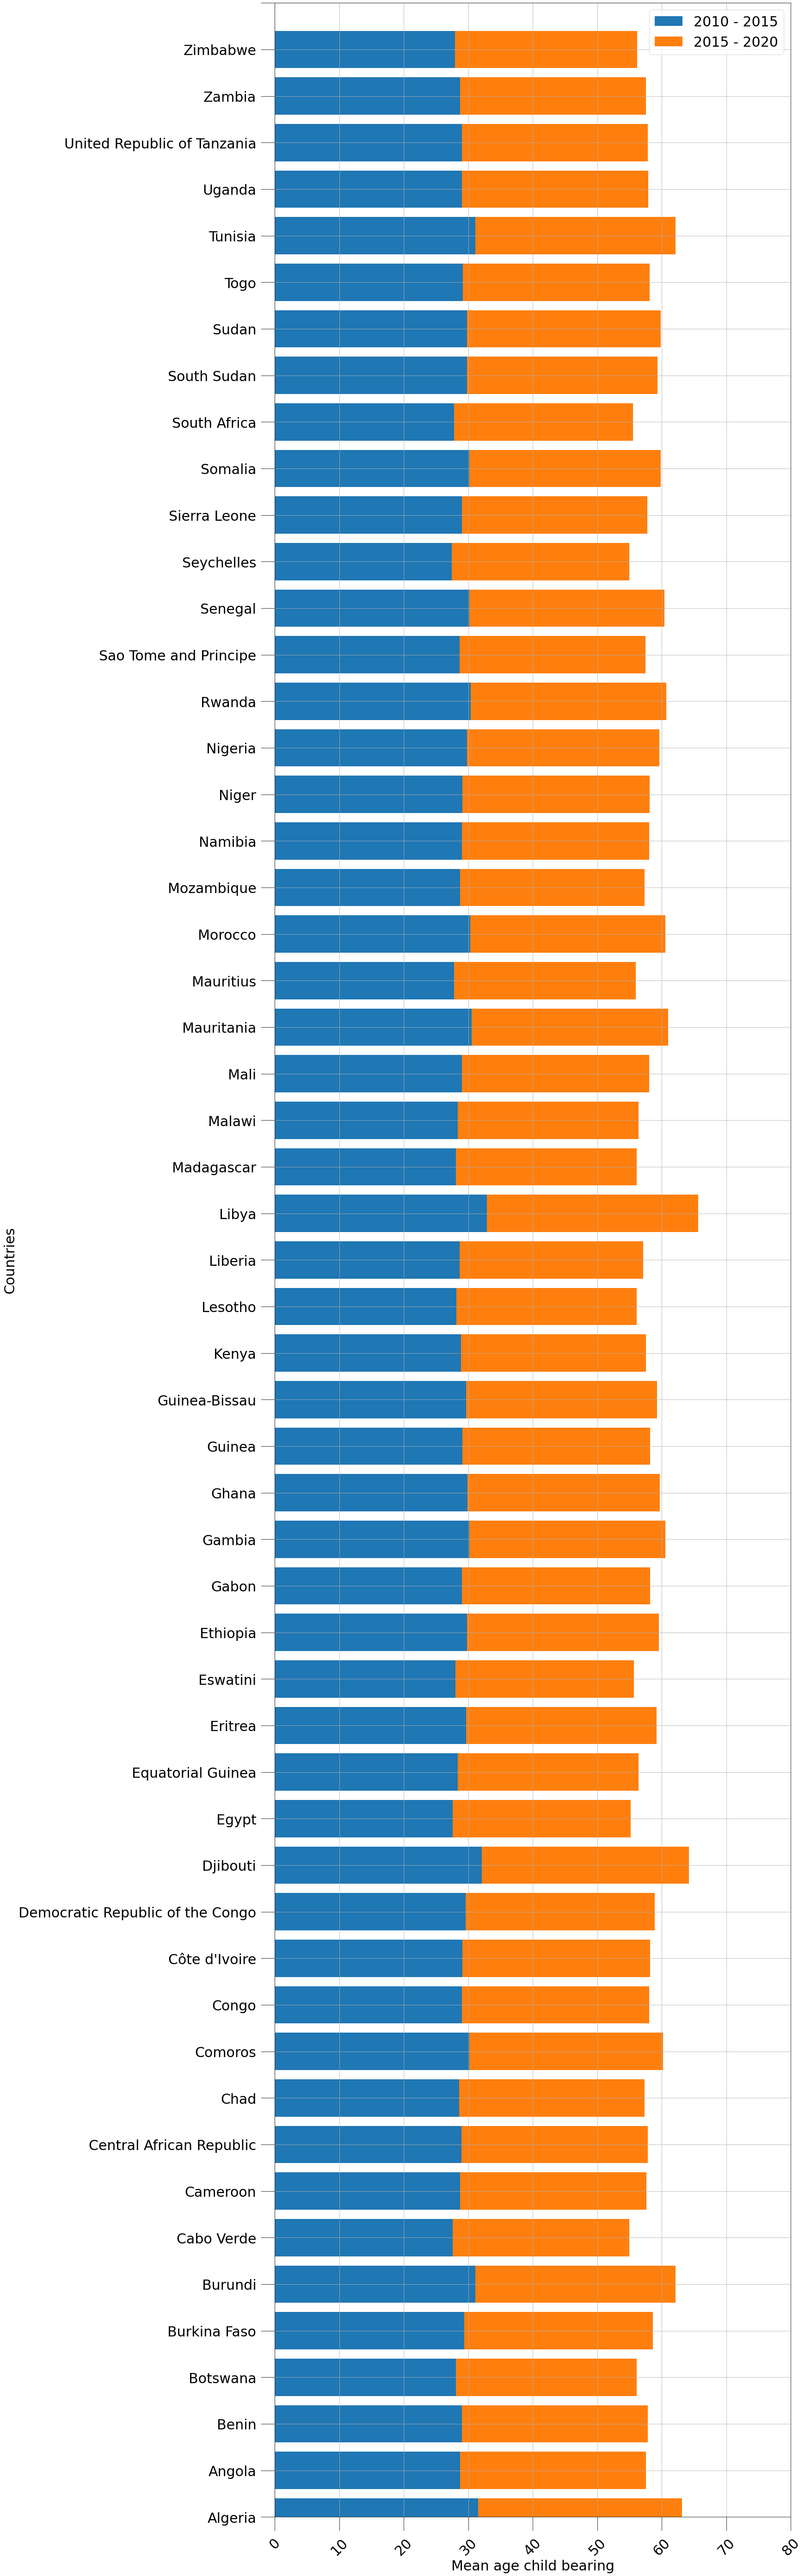

In [94]:
from matplotlib import pyplot as plt 

country = []
firstYear = []
secondYear = []
width = 0.8
print(my_db.list_collection_names())
for row in my_col.find():
    country.append(row['Location'])
    firstYear.append(row['2010 - 2015'])
    secondYear.append(row['2015 - 2020'])
firstYear = [float(num) for num in firstYear]
secondYear = [float(num) for num in secondYear]
plt.figure(figsize = (20, 100))
plt.barh(country,firstYear, 0.8, label='2010 - 2015')
plt.barh(country, secondYear, 0.8, left= firstYear, label='2015 - 2020')
plt.ylabel('Countries', fontsize=30)
plt.xlabel('Mean age child bearing', fontsize=30)
plt.tick_params(length= 30 , pad=10)
plt.yticks(rotation=0, fontsize=30)
plt.xticks(rotation=45, fontsize=30)
plt.legend(fontsize = 30,)
plt.grid()
plt.axis([0,80, 0, __])


plt.show()

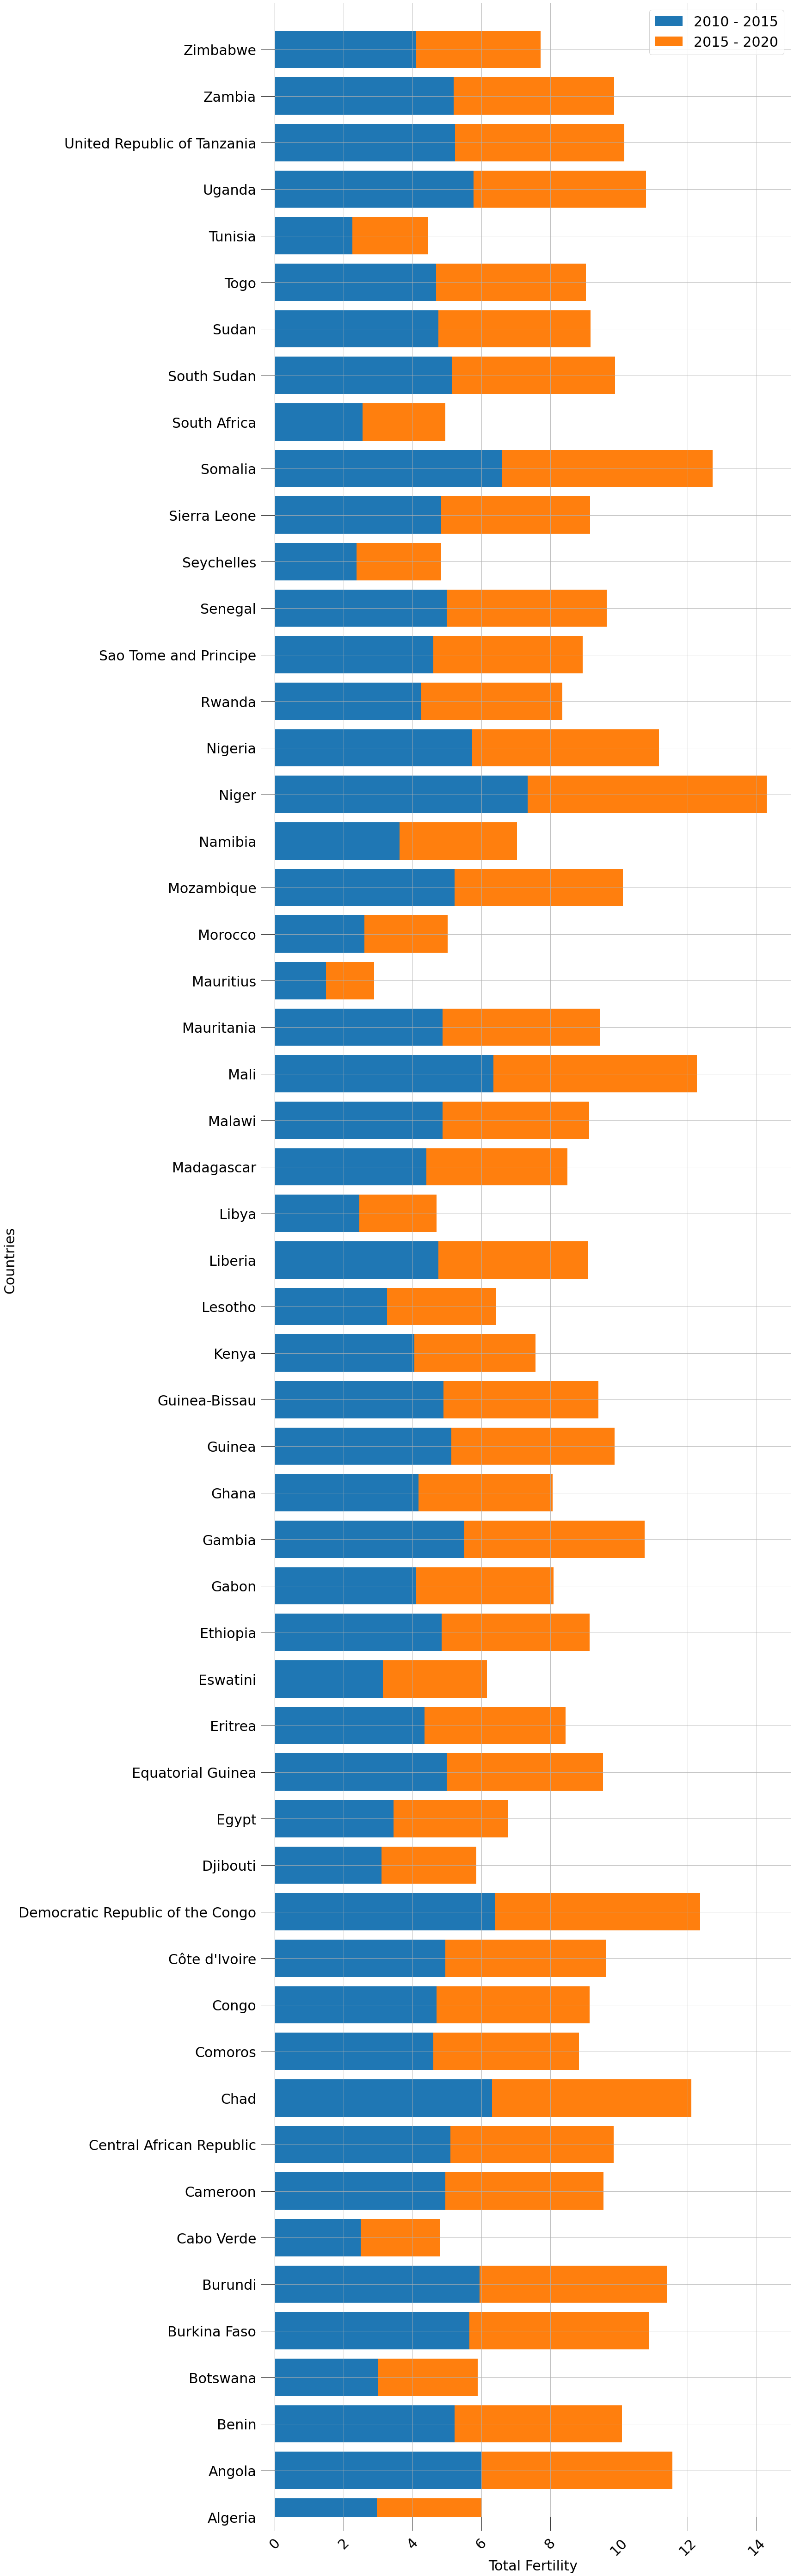

In [95]:
country = []
firstYear = []
secondYear = []
width = 0.8

for row in my_col1.find():
    country.append(row['Location'])
    firstYear.append(row['2010 - 2015'])
    secondYear.append(row['2015 - 2020'])
# firstYear = [float(num) for num in firstYear]
# secondYear = [float(num) for num in secondYear]
plt.figure(figsize = (20, 100))
plt.barh(country,firstYear, 0.8, label='2010 - 2015')
plt.barh(country, secondYear, 0.8, left= firstYear, label='2015 - 2020')
plt.ylabel('Countries', fontsize=30)
plt.xlabel('Total Fertility', fontsize=30)
plt.tick_params(length= 30 , pad=10)
plt.yticks(rotation=0, fontsize=30)
plt.xticks(rotation=45, fontsize=30)
plt.legend(fontsize = 30,)
plt.grid()
plt.axis([0,15, 0, __])


plt.show()
